# Graduate Rotational Internship Program

<h1><font color='green'>The Sparks Foundation</font></h1>



<h3><span align='center'>Data Science & Business Analytics </span>
<span><font color='red'>Tasks-1 ( Linear Regression )</font></span></h3>


<h2><font color='blue'> Prediction using Supervised ML</font></h2>

<div style="text-align: right"><h2> Srishti Bhandarkar </h2></div>

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
### This is a simple linear regression task as it involves just two variables

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Data Set 
data= 'http://bit.ly/w-data'

In [3]:
#Read data from csv
df= pd.read_csv(data)

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Get columns
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
# Rows and Column of dataset
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# statistical summary of the data set
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# Mean for scores
df['Scores'].mean

<bound method Series.mean of 0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64>

In [9]:
# Print Hour where maximum score is scored
max1=df['Scores'].max()
print(df[df['Scores']==max1]['Hours'])

15    8.9
Name: Hours, dtype: float64


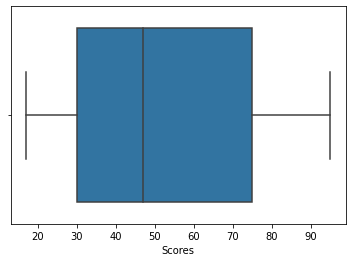

In [38]:
sns.boxplot(df.Scores)

##### Linear Relationship with Matplotlib

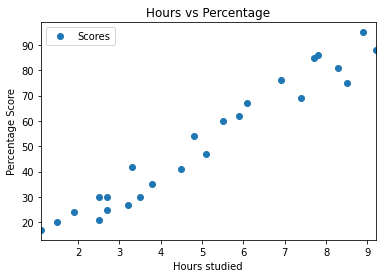

In [10]:
df.plot(x = 'Hours' , y = 'Scores' , style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

##### Linear Relationship with Seaborn

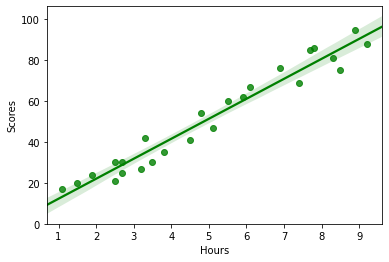

In [11]:
sns.regplot(x= 'Hours', y = 'Scores', data = df, color='g')

<p> Using both Matplotlib and Seaborn it is observed that there is positive linear relationship between Hours studied and Percentage Score.</p>

### Split the dataset into train and test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

### Model Building

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model  = LinearRegression()

In [18]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
model.score(X_train,Y_train)

0.9536486503889446

In [24]:
#Estimated coefficients for the linear regression
model.coef_

array([9.71054094])

In [25]:
#Independent term in the linear model
model.intercept_

2.794196676599803

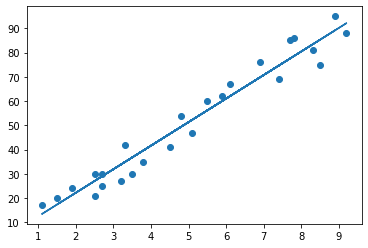

In [26]:
# Plotting the regression line
line = model.coef_ *X + model.intercept_
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [27]:
# Prediction values for X train data 
predt=model.predict(X_train)
predt


array([39.69425223, 17.36000808, 33.86792767, 46.49163089, 89.21801101,
       85.33379464, 36.78108995, 29.0126572 , 21.24422446, 49.40479317,
       62.02849639, 78.53641598, 56.20217183, 77.56536189, 13.47579171,
       74.65219961, 92.13117329])

In [28]:
# Prediction values for test data 
predx=model.predict(X_test)
predx

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

### Comparison between actual and predicted

In [29]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': predx})  
df1

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


## Model Evaluation

In [30]:
from sklearn.metrics import r2_score

score = r2_score(Y_test, predx)
print("R_squared Error :", score)

R_squared Error : 0.9487647340257012


In [33]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(Y_test, predx)
MSE = mean_squared_error(Y_test, predx)

print("Mean Absolute Error : ", MAE)
print("Mean Squared Error : ", MSE)
print("Root Mean Squared Error (RMSE) :", np.sqrt(MSE))

Mean Absolute Error :  4.499999999999998
Mean Squared Error :  23.61945761415174
Root Mean Squared Error (RMSE) : 4.859985351228103


## Question - What will be predicted score if a student study for 9.25 hrs in a day?

In [34]:
hours = [[9.25]]
own_pred = model.predict(hours)
print("If a student study for 9.25 Hrs in a day then predicted score : ", own_pred[0])


If a student study for 9.25 Hrs in a day then predicted score :  92.61670033840096


In [35]:
error_test = Y_test - predx
error_test

array([-2.39168645,  2.92945098, -6.07054902,  6.20307086,  1.9136118 ,
       -4.0126572 ,  7.16101823, -5.31795545])

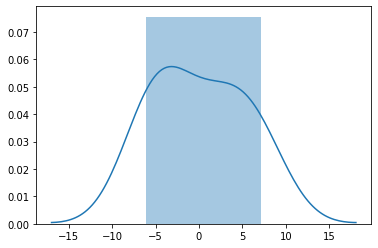

In [36]:
sns.distplot(error_test)

(array([2., 1., 1., 0., 0., 0., 2., 0., 0., 2.]),
 array([-6.07054902, -4.74739229, -3.42423557, -2.10107884, -0.77792212,
         0.54523461,  1.86839133,  3.19154806,  4.51470478,  5.83786151,
         7.16101823]),
 <a list of 10 Patch objects>)

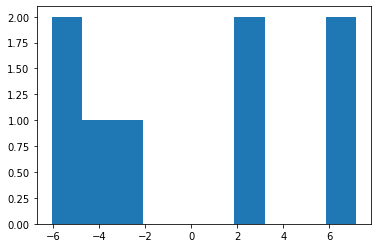

In [37]:
plt.hist(error_test)

### Conclusion

By seeing the regression model we can see that if a student studies for more hours, his percentage score will be higher. If a student studies for 9.25 hours he will score 93 marks approximately according to the model built. Model built has a accuracy of 87 which is quite good. It also shows very good values of Rsquare and AdjRsquare Model has very less Mean Absolute Error around 4 which shows that model is successful.